# [CAPSTONE] Fruits Freshness Classifier based on RBG using XG Boost

# Executive Summary

Problem Statement:

- It is difficult to identify the freshness of each of the fruits when the number of fruits is in large volume
- It is important to monitor the freshness of the fruits from time to time to ensure that the customer will come again

Scope:

- The dataset covers fruits specifically on apples, bananas, and oranges

Methodology:

- Identify whether the fruit is fresh or rotten based on the RGB
- Use Accuracy, Precision, Recall (Sensitivity), F1, MCC and Kappa to evaluate the classification performance of the models
- Use RMSE, MSE, MAE to evaluate the regression performance of the models

# Importing the Libraries

In [115]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Scaler Methods
from sklearn.preprocessing import RobustScaler, MaxAbsScaler, MinMaxScaler, StandardScaler

# Machine Learning Models

from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier

# Metrics
from sklearn.metrics import make_scorer
from sklearn.metrics import (
    make_scorer,
    accuracy_score, 
    precision_score, 
    recall_score, 
    f1_score, 
    matthews_corrcoef, 
    cohen_kappa_score,
    mean_squared_error,
    mean_absolute_error,
    confusion_matrix, 
    ConfusionMatrixDisplay,
    classification_report
)

import pickle


# Importing the Database

In [2]:
df = pd.read_csv("fruits.csv")


In [3]:
df


,Image,Red,Green,Blue,Contrast,Energy,Correlation,Homogeneity,Freshness
0,rotated_by_75_Screen Shot 2018-06-08 at 5.25.0...,480016,320784,308173,1455.458367,0.091725,0.826346,0.216102,1
1,rotated_by_15_Screen Shot 2018-06-08 at 5.15.2...,429908,287132,294462,1898.266122,0.089732,0.849394,0.243132,1
2,rotated_by_15_Screen Shot 2018-06-08 at 5.26.4...,493084,503330,363093,1304.415102,0.298530,0.871957,0.475525,1
3,rotated_by_15_Screen Shot 2018-06-08 at 5.27.0...,398133,463717,277134,1057.761224,0.087325,0.859704,0.302005,1
4,rotated_by_75_Screen Shot 2018-06-08 at 5.33.4...,403308,424642,264396,2111.405306,0.109698,0.800220,0.234803,1
...,...,...,...,...,...,...,...,...,...
10896,saltandpepper_Screen Shot 2018-06-12 at 11.46....,510687,494520,443423,252.043265,0.143389,0.848958,0.359614,0
10897,rotated_by_75_Screen Shot 2018-06-12 at 11.40....,337028,264447,225432,882.749388,0.131601,0.892012,0.216836,0
10898,Screen Shot 2018-06-12 at 11.46.17 PM,514385,463767,426552,441.551020,0.113603,0.919746,0.324600,0
10899,rotated_by_15_Screen Shot 2018-06-12 at 11.45....,452977,368142,305902,1738.992653,0.224891,0.850204,0.377876,0


# Exploratory Data Analysis (EDA)

In [4]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10901 entries, 0 to 10900
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Image        10901 non-null  object 
 1   Red          10901 non-null  int64  
 2   Green        10901 non-null  int64  
 3   Blue         10901 non-null  int64  
 4   Contrast     10901 non-null  float64
 5   Energy       10901 non-null  float64
 6   Correlation  10901 non-null  float64
 7   Homogeneity  10901 non-null  float64
 8   Freshness    10901 non-null  int64  
dtypes: float64(4), int64(4), object(1)
memory usage: 766.6+ KB


In [5]:
df.describe()


,Red,Green,Blue,Contrast,Energy,Correlation,Homogeneity,Freshness
count,10901.000000,10901.000000,10901.000000,10901.000000,10901.000000,10901.000000,10901.000000,10901.000000
mean,466876.253646,402949.903036,337048.713788,1337.803641,0.258193,0.887706,0.427981,0.434822
std,83431.591490,85979.015033,84021.923106,777.397036,0.140672,0.043782,0.138434,0.495756
min,74212.000000,54894.000000,38685.000000,31.596735,0.016229,0.406196,0.041493,0.000000
25%,418183.000000,345000.000000,279333.000000,647.005714,0.159700,0.864890,0.338576,0.000000
50%,472741.000000,400620.000000,333381.000000,1387.058776,0.233098,0.888041,0.410762,0.000000
75%,522343.000000,460991.000000,392566.000000,1789.657143,0.331826,0.915210,0.502112,1.000000
max,633913.000000,622438.000000,571283.000000,5078.617143,0.788228,0.993536,0.878452,1.000000


In [6]:
df.isnull().sum()


Image          0
Red            0
Green          0
Blue           0
Contrast       0
Energy         0
Correlation    0
Homogeneity    0
Freshness      0
dtype: int64

In [7]:
df.dtypes


Image           object
Red              int64
Green            int64
Blue             int64
Contrast       float64
Energy         float64
Correlation    float64
Homogeneity    float64
Freshness        int64
dtype: object

In [8]:
df = df.drop(columns=['Image'])


In [9]:
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]


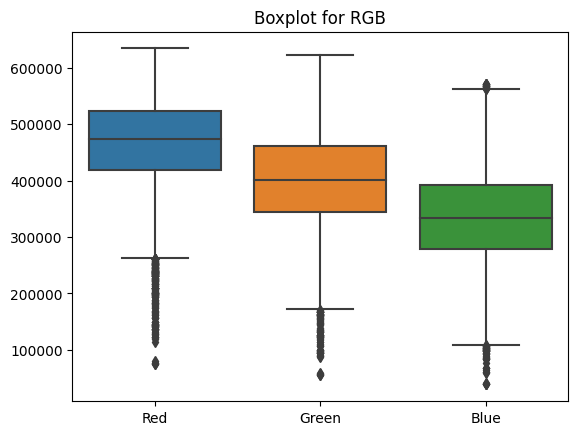

In [10]:
columns = ['Red', 'Green', 'Blue']
df_rgb = df[columns]

sns.boxplot(data=df_rgb)
plt.title("Boxplot for RGB")
plt.show()


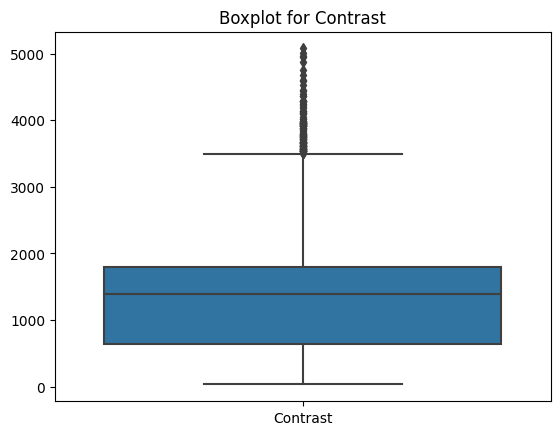

In [11]:
columns = ['Contrast']
df_contrast = df[columns]

sns.boxplot(data=df_contrast)
plt.title("Boxplot for Contrast")
plt.show()


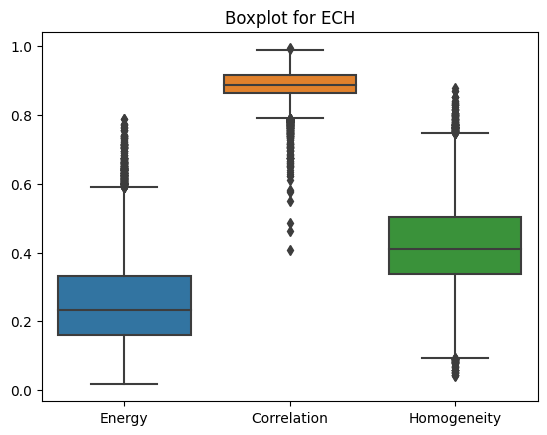

In [12]:
columns = ['Energy', 'Correlation', 'Homogeneity']
df_ech = df[columns]

sns.boxplot(data=df_ech)
plt.title("Boxplot for ECH")
plt.show()


In [13]:
for col in df.columns:
    df = remove_outliers(df, col)


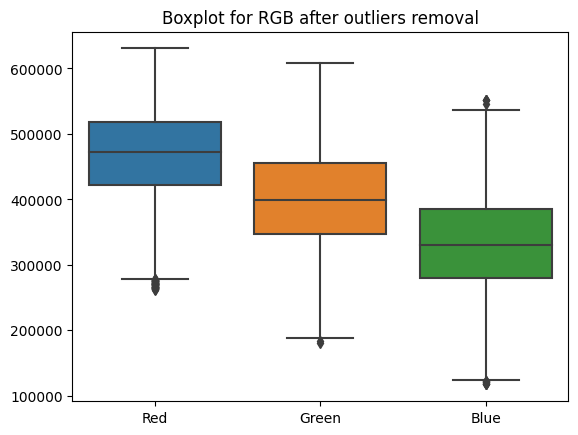

In [14]:
columns = ['Red', 'Green', 'Blue']
df_rgb = df[columns]

sns.boxplot(data=df_rgb)
plt.title("Boxplot for RGB after outliers removal")
plt.show()


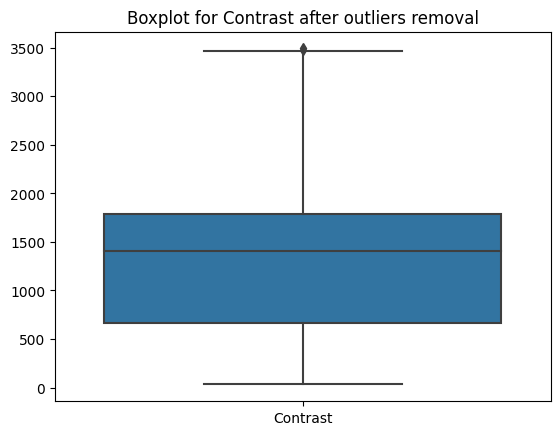

In [15]:
columns = ['Contrast']
df_contrast = df[columns]

sns.boxplot(data=df_contrast)
plt.title("Boxplot for Contrast after outliers removal")
plt.show()


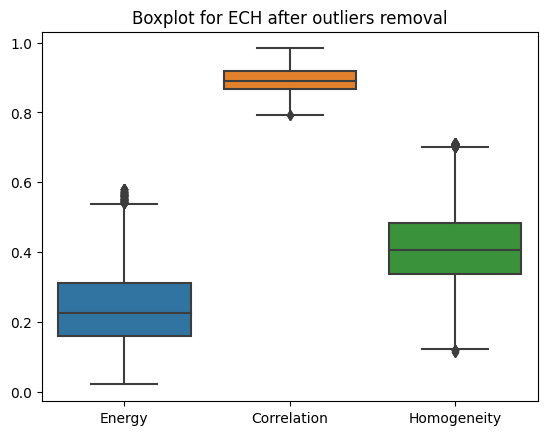

In [16]:
columns = ['Energy', 'Correlation', 'Homogeneity']
df_ech = df[columns]

sns.boxplot(data=df_ech)
plt.title("Boxplot for ECH after outliers removal")
plt.show()


In [17]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 9764 entries, 0 to 10900
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Red          9764 non-null   int64  
 1   Green        9764 non-null   int64  
 2   Blue         9764 non-null   int64  
 3   Contrast     9764 non-null   float64
 4   Energy       9764 non-null   float64
 5   Correlation  9764 non-null   float64
 6   Homogeneity  9764 non-null   float64
 7   Freshness    9764 non-null   int64  
dtypes: float64(4), int64(4)
memory usage: 686.5 KB


# Correlation Matrix

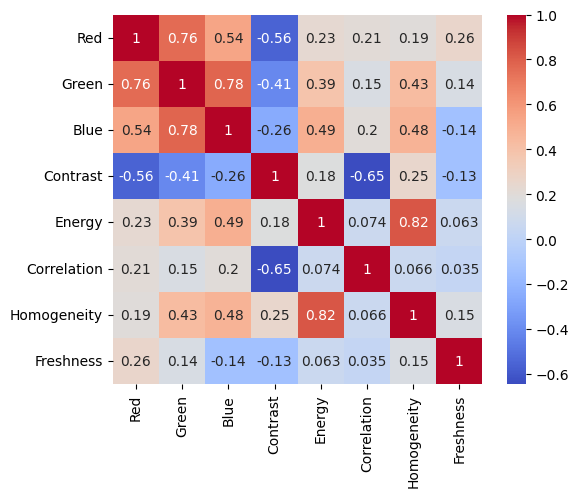

<Figure size 1000x800 with 0 Axes>

In [18]:

corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', square=True)
plt.figure(figsize=(10, 8))
plt.show()


** Since the correlation between the features and freshness are not relatively storng, considering to use non-linear maching learning models here.

# Distribution for Each Columns

In [19]:
skewness = df.skew()

print("Skewness for each column:")
print(skewness)


Skewness for each column:
Red           -0.219872
Green          0.120736
Blue           0.051449
Contrast       0.238257
Energy         0.553582
Correlation    0.059359
Homogeneity    0.300997
Freshness      0.227631
dtype: float64


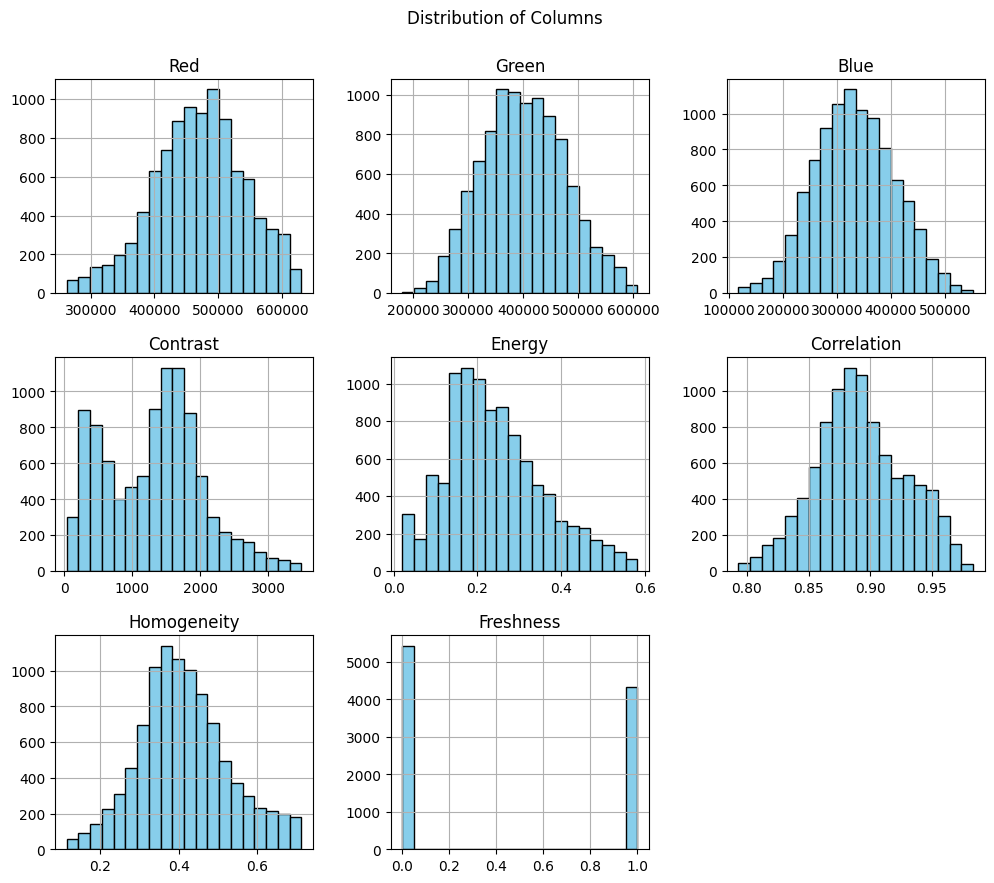

In [20]:
# Assuming df is your DataFrame
df.hist(figsize=(12, 10), bins=20, color='skyblue', edgecolor='black')
plt.suptitle('Distribution of Columns', y=0.95)
plt.show()


** Only Energy is relatively left-skewed

# Feature Extraction

In [21]:
x = df.drop(columns=['Freshness'])
y = df['Freshness']


# Scaling the Data

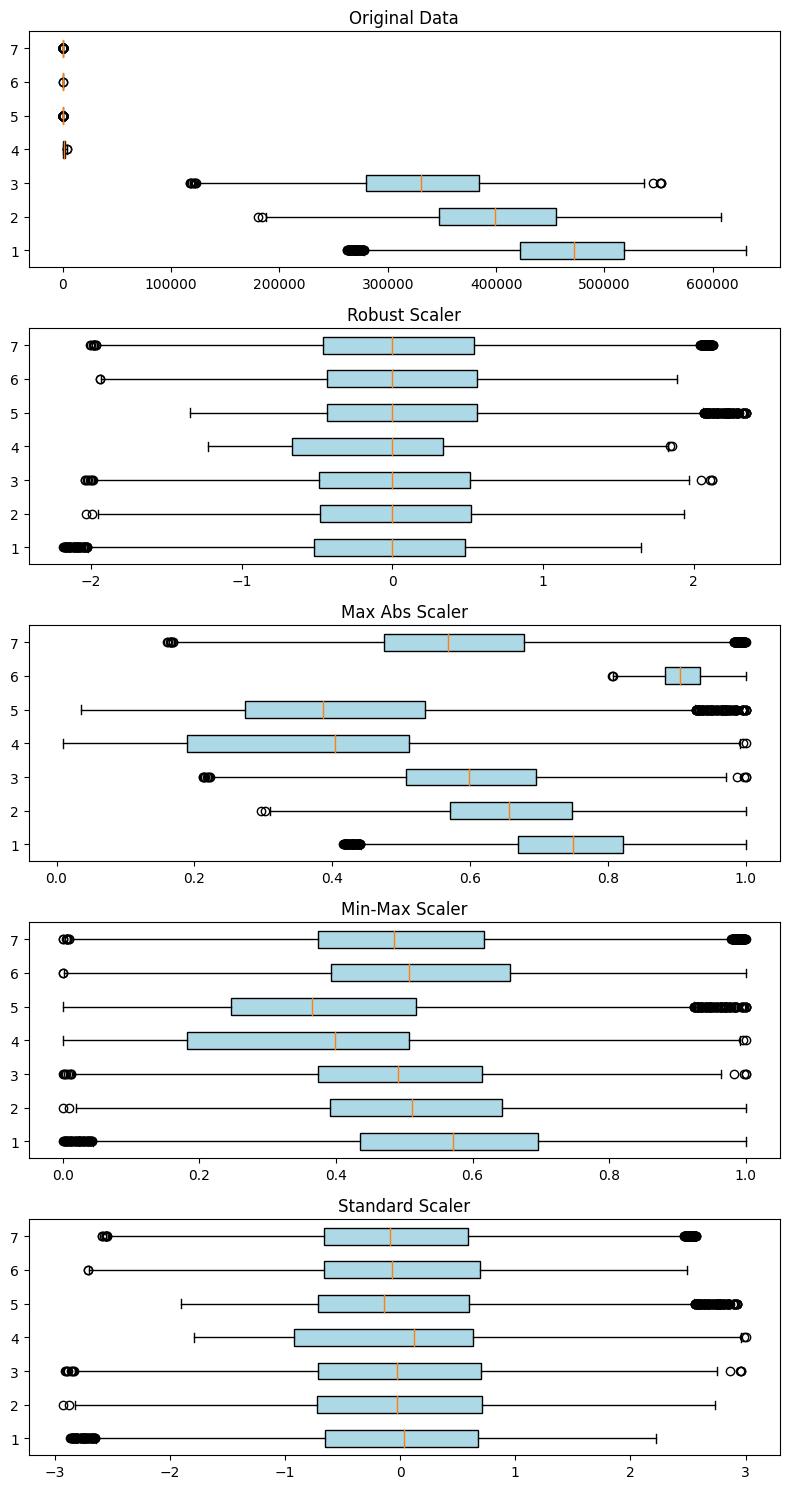

In [22]:
scalers = {
    'Robust Scaler': RobustScaler(),
    'Max Abs Scaler': MaxAbsScaler(),
    'Min-Max Scaler': MinMaxScaler(),
    'Standard Scaler': StandardScaler()
}

x_robust_scale = scalers['Robust Scaler'].fit_transform(x)
x_max_abs_scale = scalers['Max Abs Scaler'].fit_transform(x)
x_min_max_scale = scalers['Min-Max Scaler'].fit_transform(x)
x_standard_scale = scalers['Standard Scaler'].fit_transform(x)

fig, axs = plt.subplots(5, 1, figsize=(8, 15))
axs[0].boxplot(x.values, vert=False, patch_artist=True, boxprops=dict(facecolor='lightblue'))
axs[0].set_title('Original Data')

scaling_results = {
    'Robust Scaler': x_robust_scale,
    'Max Abs Scaler': x_max_abs_scale,
    'Min-Max Scaler': x_min_max_scale,
    'Standard Scaler': x_standard_scale
}

for idx, (scaler_name, scaled_data) in enumerate(scaling_results.items(), start=1):
    axs[idx].boxplot(scaled_data, vert=False, patch_artist=True, boxprops=dict(facecolor='lightblue'))
    axs[idx].set_title(scaler_name)

plt.tight_layout()
plt.show()


** Although there are significant difference for each of the scaler methods, it is important to know which scaler should be paired with which type of machine learning models
** Max Abs Scaler is suitable when the data has positive and negative values, since the data here are all in postiive, this option may not be required
** Min-max Scaler is suitable for Neural Network Models

# Model Selection & Training

Linear
- 1. Logistic Regression

Non-linear
- 2. Support Vector Machine (SVC)
- 3. Decision Tree
- 4. Random Forest
- 5. K Neighbors (KNN)
- 6. Naive Bayes
- 7. XGBoost
- 8. AdaBoost

Neural Network



In [23]:
x_train, x_test, y_train, y_test = train_test_split(x_standard_scale, y, test_size=0.3, random_state=42)


## Logistic Regression Classifier

In [24]:
logisticModel = LogisticRegression()
logisticModel.fit(x_train, y_train)


LogisticRegression()

In [25]:
logisticModelAccuracy = np.mean(cross_val_score(logisticModel, x_train, y_train, scoring=make_scorer(accuracy_score), cv=30))*100
logisticModelPrecision = np.mean(cross_val_score(logisticModel, x_train, y_train, scoring=make_scorer(precision_score), cv=30))*100
logisticModelSenstivity = np.mean(cross_val_score(logisticModel, x_train, y_train, scoring=make_scorer(recall_score), cv=30))*100
logisticModelF1Score = np.mean(cross_val_score(logisticModel, x_train, y_train, scoring=make_scorer(f1_score), cv=30))*100
logisticModelMCCScore = np.mean(cross_val_score(logisticModel, x_train, y_train, scoring=make_scorer(matthews_corrcoef), cv=30))*100
logisticModelKappaCoeff = np.mean(cross_val_score(logisticModel, x_train, y_train, scoring=make_scorer(cohen_kappa_score), cv=30))*100


In [26]:
print("Train Accuracy: ", logisticModelAccuracy*100)
print("Train Precision: ", logisticModelPrecision*100)
print("Train Senstivity: ", logisticModelSenstivity*100)
print("Train F1 Score: ", logisticModelF1Score*100)
print("Train MCC Score: ", logisticModelMCCScore*100)
print("Train Kappa Coefficiet: ", logisticModelKappaCoeff*100)


Train Accuracy:  7464.15230440271
Train Precision:  7330.641377848939
Train Senstivity:  6717.392739273927
Train F1 Score:  7006.104903835823
Train MCC Score:  4832.6411592484965
Train Kappa Coefficiet:  4814.645663003126


In [27]:
y_pred_logistic = logisticModel.predict(x_test)


In [28]:
mse_logistic = mean_squared_error(y_test, y_pred_logistic)
rmse_logistic = np.sqrt(mse_logistic)
mae_logistic = mean_absolute_error(y_test, y_pred_logistic)

print(f"MSE: {mse_logistic}")
print(f"RMSE: {rmse_logistic}")
print(f"MAE: {mae_logistic}")


MSE: 0.26348122866894197
RMSE: 0.5133042262332758
MAE: 0.26348122866894197


In [29]:
logisticModelTestAccuracy = accuracy_score(y_test, y_pred_logistic)*100
logisticModelTestPrecision = precision_score(y_test, y_pred_logistic)*100
logisticModelTestSenstivity = recall_score(y_test, y_pred_logistic)*100
logisticModelTestF1Score = f1_score(y_test, y_pred_logistic)*100
logisticModelTestMCCScore = matthews_corrcoef(y_test, y_pred_logistic)*100
logisticModelTestKappaCoeff = cohen_kappa_score(y_test, y_pred_logistic)*100

print(f"Test Accuracy: {logisticModelTestAccuracy*100}")
print(f"Test Precision: {logisticModelPrecision*100}")
print(f"Test Senstivity: {logisticModelSenstivity*100}")
print(f"Test F1 Score: {logisticModelF1Score*100}")
print(f"Test MCC Score: {logisticModelMCCScore*100}")
print(f"Test Kappa Coefficiet: {logisticModelKappaCoeff*100}")


Test Accuracy: 7365.18771331058
Test Precision: 7330.641377848939
Test Senstivity: 6717.392739273927
Test F1 Score: 7006.104903835823
Test MCC Score: 4832.6411592484965
Test Kappa Coefficiet: 4814.645663003126


In [30]:
report_logistic = classification_report(y_test, y_pred_logistic)
print(report_logistic)


              precision    recall  f1-score   support

           0       0.74      0.82      0.77      1622
           1       0.74      0.64      0.68      1308

    accuracy                           0.74      2930
   macro avg       0.74      0.73      0.73      2930
weighted avg       0.74      0.74      0.73      2930



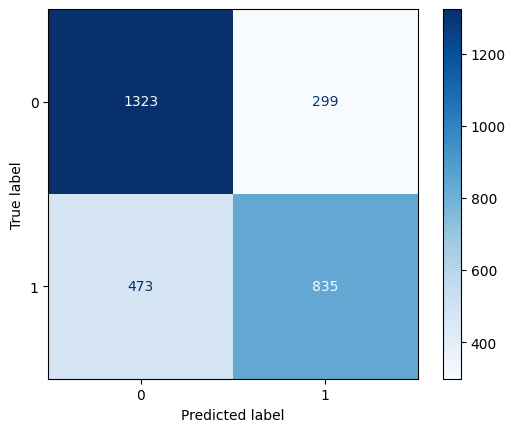

In [31]:
cm_logistic = confusion_matrix(y_test, y_pred_logistic)

disp = ConfusionMatrixDisplay(confusion_matrix=cm_logistic)
disp.plot(cmap=plt.cm.Blues)
plt.show()


## Support Vector Machine Classifier (SVM)

In [32]:
svmModel = SVC()
svmModel.fit(x_train, y_train)


SVC()

In [33]:
svmModelAccuracy = np.mean(cross_val_score(svmModel, x_train, y_train, scoring=make_scorer(accuracy_score), cv=30))*100
svmModelPrecision = np.mean(cross_val_score(svmModel, x_train, y_train, scoring=make_scorer(precision_score), cv=30))*100
svmModelSenstivity = np.mean(cross_val_score(svmModel, x_train, y_train, scoring=make_scorer(recall_score), cv=30))*100
svmModelF1Score = np.mean(cross_val_score(svmModel, x_train, y_train, scoring=make_scorer(f1_score), cv=30))*100
svmModelMCCScore = np.mean(cross_val_score(svmModel, x_train, y_train, scoring=make_scorer(matthews_corrcoef), cv=30))*100
svmModelKappaCoeff = np.mean(cross_val_score(svmModel, x_train, y_train, scoring=make_scorer(cohen_kappa_score), cv=30))*100


In [34]:
print("Train Accuracy: ", svmModelAccuracy*100)
print("Train Precision: ", svmModelPrecision*100)
print("Train Senstivity: ", svmModelSenstivity*100)
print("Train F1 Score: ", svmModelF1Score*100)
print("Train MCC Score: ", svmModelMCCScore*100)
print("Train Kappa Coefficiet: ", svmModelKappaCoeff*100)


Train Accuracy:  8637.671638714995
Train Precision:  8668.024385395693
Train Senstivity:  8183.201320132013
Train F1 Score:  8414.73474776269
Train MCC Score:  7236.169269154683
Train Kappa Coefficiet:  7222.311133050082


In [35]:
y_pred_svm = svmModel.predict(x_test)


In [36]:
mse_svm = mean_squared_error(y_test, y_pred_svm)
rmse_svm = np.sqrt(mse_svm)
mae_svm = mean_absolute_error(y_test, y_pred_svm)

print(f"MSE: {mse_svm}")
print(f"RMSE: {rmse_svm}")
print(f"MAE: {mae_svm}")


MSE: 0.15187713310580206
RMSE: 0.38971416846940793
MAE: 0.15187713310580206


In [37]:
svmModelTestAccuracy = accuracy_score(y_test, y_pred_svm)*100
svmModelTestPrecision = precision_score(y_test, y_pred_svm)*100
svmModelTestSenstivity = recall_score(y_test, y_pred_svm)*100
svmModelTestF1Score = f1_score(y_test, y_pred_svm)*100
svmModelTestMCCScore = matthews_corrcoef(y_test, y_pred_svm)*100
svmModelTestKappaCoeff = cohen_kappa_score(y_test, y_pred_svm)*100

print(f"Test Accuracy: {svmModelTestAccuracy*100}")
print(f"Test Precision: {svmModelTestPrecision*100}")
print(f"Test Senstivity: {svmModelTestSenstivity*100}")
print(f"Test F1 Score: {svmModelTestF1Score*100}")
print(f"Test MCC Score: {svmModelTestMCCScore*100}")
print(f"Test Kappa Coefficiet: {svmModelTestKappaCoeff*100}")


Test Accuracy: 8481.22866894198
Test Precision: 8604.845446950709
Test Senstivity: 7874.617737003058
Test F1 Score: 8223.552894211576
Test MCC Score: 6922.42017288289
Test Kappa Coefficiet: 6901.716560946968


In [38]:
report_svm = classification_report(y_test, y_pred_svm)
print(report_svm)


              precision    recall  f1-score   support

           0       0.84      0.90      0.87      1622
           1       0.86      0.79      0.82      1308

    accuracy                           0.85      2930
   macro avg       0.85      0.84      0.84      2930
weighted avg       0.85      0.85      0.85      2930



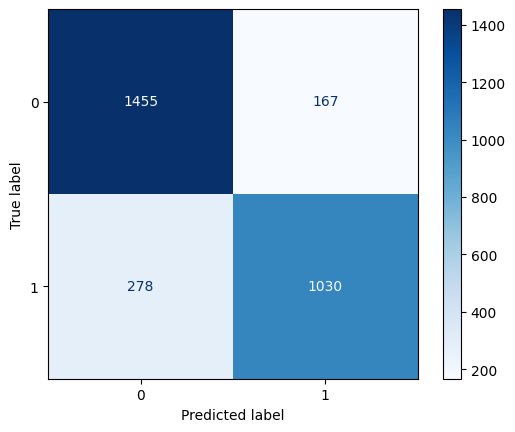

In [39]:
cm_svm = confusion_matrix(y_test, y_pred_svm)

disp = ConfusionMatrixDisplay(confusion_matrix=cm_svm)
disp.plot(cmap=plt.cm.Blues)
plt.show()


## Decision Tree Classifier

In [40]:
decisionTreeModel = DecisionTreeClassifier()
decisionTreeModel.fit(x_train, y_train)


DecisionTreeClassifier()

In [41]:
decisionTreeModelAccuracy = np.mean(cross_val_score(decisionTreeModel, x_train, y_train, scoring=make_scorer(accuracy_score), cv=30))*100
decisionTreeModelPrecision = np.mean(cross_val_score(decisionTreeModel, x_train, y_train, scoring=make_scorer(precision_score), cv=30))*100
decisionTreeModelSenstivity = np.mean(cross_val_score(decisionTreeModel, x_train, y_train, scoring=make_scorer(recall_score), cv=30))*100
decisionTreeModelF1Score = np.mean(cross_val_score(decisionTreeModel, x_train, y_train, scoring=make_scorer(f1_score), cv=30))*100
decisionTreeModelMCCScore = np.mean(cross_val_score(decisionTreeModel, x_train, y_train, scoring=make_scorer(matthews_corrcoef), cv=30))*100
decisionTreeModelKappaCoeff = np.mean(cross_val_score(decisionTreeModel, x_train, y_train, scoring=make_scorer(cohen_kappa_score), cv=30))*100


In [42]:
print("Train Accuracy: ", decisionTreeModelAccuracy*100)
print("Train Precision: ", decisionTreeModelPrecision*100)
print("Train Senstivity: ", decisionTreeModelSenstivity*100)
print("Train F1 Score: ", decisionTreeModelF1Score*100)
print("Train MCC Score: ", decisionTreeModelMCCScore*100)
print("Train Kappa Coefficiet: ", decisionTreeModelKappaCoeff*100)


Train Accuracy:  8552.728186104026
Train Precision:  8435.649099361057
Train Senstivity:  8312.178217821784
Train F1 Score:  8379.177184541539
Train MCC Score:  7087.360954712037
Train Kappa Coefficiet:  7064.231567262482


In [43]:
y_pred_decision_tree = decisionTreeModel.predict(x_test)


In [44]:
mse_decision_tree = mean_squared_error(y_test, y_pred_decision_tree)
rmse_decision_tree = np.sqrt(mse_decision_tree)
mae_decision_tree = mean_absolute_error(y_test, y_pred_decision_tree)

print(f"MSE: {mse_decision_tree}")
print(f"RMSE: {rmse_decision_tree}")
print(f"MAE: {mae_decision_tree}")


MSE: 0.1477815699658703
RMSE: 0.3844236854902027
MAE: 0.1477815699658703


In [45]:
decisionTreeModelTestAccuracy = accuracy_score(y_test, y_pred_decision_tree)*100
decisionTreeModelTestPrecision = precision_score(y_test, y_pred_decision_tree)*100
decisionTreeModelTestSenstivity = recall_score(y_test, y_pred_decision_tree)*100
decisionTreeModelTestF1Score = f1_score(y_test, y_pred_decision_tree)*100
decisionTreeModelTestMCCScore = matthews_corrcoef(y_test, y_pred_decision_tree)*100
decisionTreeModelTestKappaCoeff = cohen_kappa_score(y_test, y_pred_decision_tree)*100

print(f"Test Accuracy: {decisionTreeModelTestAccuracy*100}")
print(f"Test Precision: {decisionTreeModelTestPrecision*100}")
print(f"Test Senstivity: {decisionTreeModelTestSenstivity*100}")
print(f"Test F1 Score: {decisionTreeModelTestF1Score*100}")
print(f"Test MCC Score: {decisionTreeModelTestMCCScore*100}")
print(f"Test Kappa Coefficiet: {decisionTreeModelTestKappaCoeff*100}")


Test Accuracy: 8522.184300341298
Test Precision: 8425.998433829287
Test Senstivity: 8226.299694189604
Test F1 Score: 8324.95164410058
Test MCC Score: 7004.766889016804
Test Kappa Coefficiet: 7003.154425100474


In [46]:
report_decision_tree = classification_report(y_test, y_pred_decision_tree)
print(report_decision_tree)


              precision    recall  f1-score   support

           0       0.86      0.88      0.87      1622
           1       0.84      0.82      0.83      1308

    accuracy                           0.85      2930
   macro avg       0.85      0.85      0.85      2930
weighted avg       0.85      0.85      0.85      2930



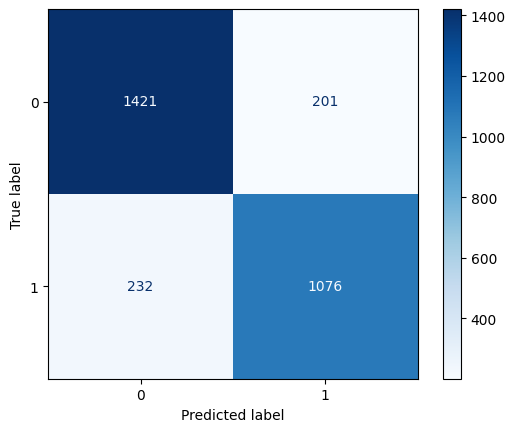

In [47]:
cm_decision_tree = confusion_matrix(y_test, y_pred_decision_tree)

disp = ConfusionMatrixDisplay(confusion_matrix=cm_decision_tree)
disp.plot(cmap=plt.cm.Blues)
plt.show()


## Random Forest Classifier

In [48]:
randomForestModel = RandomForestClassifier()
randomForestModel.fit(x_train, y_train)


RandomForestClassifier()

In [49]:
randomForestModelAccuracy = np.mean(cross_val_score(randomForestModel, x_train, y_train, scoring=make_scorer(accuracy_score), cv=30))*100
randomForestModelPrecision = np.mean(cross_val_score(randomForestModel, x_train, y_train, scoring=make_scorer(precision_score), cv=30))*100
randomForestModelSenstivity = np.mean(cross_val_score(randomForestModel, x_train, y_train, scoring=make_scorer(recall_score), cv=30))*100
randomForestModelF1Score = np.mean(cross_val_score(randomForestModel, x_train, y_train, scoring=make_scorer(f1_score), cv=30))*100
randomForestModelMCCScore = np.mean(cross_val_score(randomForestModel, x_train, y_train, scoring=make_scorer(matthews_corrcoef), cv=30))*100
randomForestModelKappaCoeff = np.mean(cross_val_score(randomForestModel, x_train, y_train, scoring=make_scorer(cohen_kappa_score), cv=30))*100


In [50]:
print("Accuracy: ", randomForestModelAccuracy*100)
print("Precision: ", randomForestModelPrecision*100)
print("Senstivity: ", randomForestModelSenstivity*100)
print("F1 Score: ", randomForestModelF1Score*100)
print("MCC Score: ", randomForestModelMCCScore*100)
print("Kappa Coefficiet: ", randomForestModelKappaCoeff*100)


Accuracy:  9029.83228997604
Precision:  9052.871420333931
Senstivity:  8696.435643564357
F1 Score:  8881.699977780247
MCC Score:  8043.4712083279155
Kappa Coefficiet:  8024.307977072654


In [51]:
y_pred_random_forest = randomForestModel.predict(x_test)


In [52]:
mse_random_forest = mean_squared_error(y_test, y_pred_random_forest)
rmse_random_forest = np.sqrt(mse_random_forest)
mae_random_forest = mean_absolute_error(y_test, y_pred_random_forest)

print(f"MSE: {mse_random_forest}")
print(f"RMSE: {rmse_random_forest}")
print(f"MAE: {mae_random_forest}")


MSE: 0.09931740614334471
RMSE: 0.31514664228473815
MAE: 0.09931740614334471


In [53]:
randomForestModelTestAccuracy = accuracy_score(y_test, y_pred_random_forest)*100
randomForestModelTestPrecision = precision_score(y_test, y_pred_random_forest)*100
randomForestModelTestSenstivity = recall_score(y_test, y_pred_random_forest)*100
randomForestTestModelF1Score = f1_score(y_test, y_pred_random_forest)*100
randomForestModelTestMCCScore = matthews_corrcoef(y_test, y_pred_random_forest)*100
randomForestModelTestKappaCoeff = cohen_kappa_score(y_test, y_pred_random_forest)*100

print(f"Test Accuracy: {randomForestModelTestAccuracy*100}")
print(f"Test Precision: {randomForestModelTestPrecision*100}")
print(f"Test Senstivity: {randomForestModelTestSenstivity*100}")
print(f"Test F1 Score: {randomForestTestModelF1Score*100}")
print(f"Test MCC Score: {randomForestModelTestMCCScore*100}")
print(f"Test Kappa Coefficiet: {randomForestModelTestKappaCoeff*100}")


Test Accuracy: 9006.825938566553
Test Precision: 9110.751818916733
Test Senstivity: 8616.207951070337
Test F1 Score: 8856.581532416503
Test MCC Score: 7989.670339895791
Test Kappa Coefficiet: 7979.960472491613


In [54]:
report_random_forest = classification_report(y_test, y_pred_random_forest)
print(report_random_forest)


              precision    recall  f1-score   support

           0       0.89      0.93      0.91      1622
           1       0.91      0.86      0.89      1308

    accuracy                           0.90      2930
   macro avg       0.90      0.90      0.90      2930
weighted avg       0.90      0.90      0.90      2930



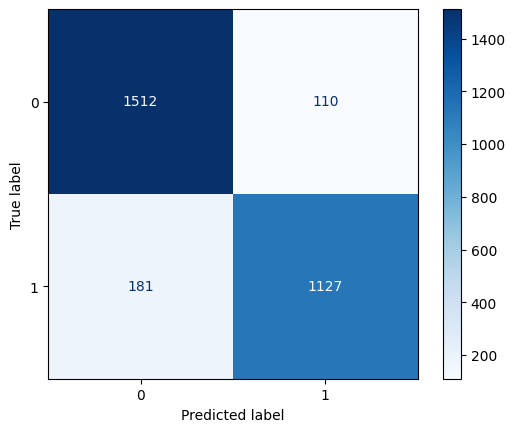

In [55]:
cm_random_forest = confusion_matrix(y_test, y_pred_random_forest)

disp = ConfusionMatrixDisplay(confusion_matrix=cm_random_forest)
disp.plot(cmap=plt.cm.Blues)
plt.show()


## K Neighbors Classifier (KNN)

In [56]:
KNNModel = KNeighborsClassifier()
KNNModel.fit(x_train, y_train)


KNeighborsClassifier()

In [57]:
KNNModelAccuracy = np.mean(cross_val_score(KNNModel, x_train, y_train, scoring=make_scorer(accuracy_score), cv=30))*100
KNNModelPrecision = np.mean(cross_val_score(KNNModel, x_train, y_train, scoring=make_scorer(precision_score), cv=30))*100
KNNModelSenstivity = np.mean(cross_val_score(KNNModel, x_train, y_train, scoring=make_scorer(recall_score), cv=30))*100
KNNModelF1Score = np.mean(cross_val_score(KNNModel, x_train, y_train, scoring=make_scorer(f1_score), cv=30))*100
KNNModelMCCScore = np.mean(cross_val_score(KNNModel, x_train, y_train, scoring=make_scorer(matthews_corrcoef), cv=30))*100
KNNModelKappaCoeff = np.mean(cross_val_score(KNNModel, x_train, y_train, scoring=make_scorer(cohen_kappa_score), cv=30))*100


In [58]:
print("Train Accuracy: ", KNNModelAccuracy*100)
print("Train Precision: ", KNNModelPrecision*100)
print("Train Senstivity: ", KNNModelSenstivity*100)
print("Train F1 Score: ", KNNModelF1Score*100)
print("Train MCC Score: ", KNNModelMCCScore*100)
print("Train Kappa Coefficiet: ", KNNModelKappaCoeff*100)


Train Accuracy:  8858.580003606667
Train Precision:  8740.52925782226
Train Senstivity:  8672.805280528053
Train F1 Score:  8704.611245895627
Train MCC Score:  7687.380728186296
Train Kappa Coefficiet:  7684.529384091519


In [59]:
y_pred_knn = KNNModel.predict(x_test)


In [60]:
mse_knn = mean_squared_error(y_test, y_pred_knn)
rmse_knn = np.sqrt(mse_knn)
mae_knn = mean_absolute_error(y_test, y_pred_knn)

print(f"MSE: {mse_knn}")
print(f"RMSE: {rmse_knn}")
print(f"MAE: {mae_knn}")


MSE: 0.11569965870307167
RMSE: 0.3401465253432286
MAE: 0.11569965870307167


In [61]:
KNNModelTestAccuracy = accuracy_score(y_test, y_pred_knn)*100
KNNModelTestPrecision = precision_score(y_test, y_pred_knn)*100
KNNModelTestSenstivity = recall_score(y_test, y_pred_knn)*100
KNNModelTestF1Score = f1_score(y_test, y_pred_knn)*100
KNNModelTestMCCScore = matthews_corrcoef(y_test, y_pred_knn)*100
KNNModelTestKappaCoeff = cohen_kappa_score(y_test, y_pred_knn)*100

print(f"Test Accuracy: {KNNModelTestAccuracy*100}")
print(f"Test Precision: {KNNModelTestPrecision*100}")
print(f"Test Senstivity: {KNNModelTestSenstivity*100}")
print(f"Test F1 Score: {KNNModelTestF1Score*100}")
print(f"Test MCC Score: {KNNModelTestMCCScore*100}")
print(f"Test Kappa Coefficiet: {KNNModelTestKappaCoeff*100}")


Test Accuracy: 8843.003412969285
Test Precision: 8848.292295472598
Test Senstivity: 8516.819571865442
Test F1 Score: 8679.39228671601
Test MCC Score: 7655.0183448969665
Test Kappa Coefficiet: 7650.603179078502


In [62]:
report_knn = classification_report(y_test, y_pred_knn)
print(report_knn)


              precision    recall  f1-score   support

           0       0.88      0.91      0.90      1622
           1       0.88      0.85      0.87      1308

    accuracy                           0.88      2930
   macro avg       0.88      0.88      0.88      2930
weighted avg       0.88      0.88      0.88      2930



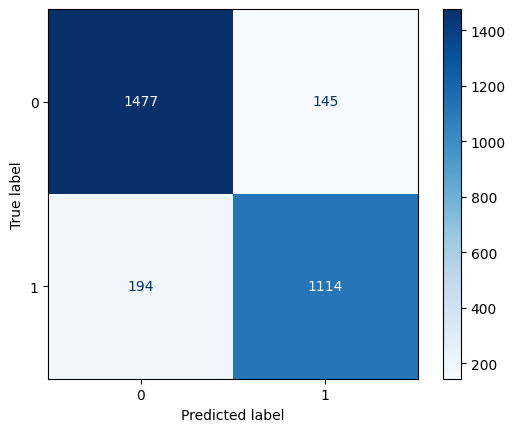

In [63]:
cm_knn = confusion_matrix(y_test, y_pred_knn)

disp = ConfusionMatrixDisplay(confusion_matrix=cm_knn)
disp.plot(cmap=plt.cm.Blues)
plt.show()


## Naive Bayes Classifier

In [64]:
naiveBayesModel = GaussianNB()
naiveBayesModel.fit(x_train, y_train)


GaussianNB()

In [65]:
naiveBayesModelAccuracy = np.mean(cross_val_score(naiveBayesModel, x_train, y_train, scoring=make_scorer(accuracy_score), cv=30))*100
naiveBayesModelPrecision = np.mean(cross_val_score(naiveBayesModel, x_train, y_train, scoring=make_scorer(precision_score), cv=30))*100
naiveBayesModelSenstivity = np.mean(cross_val_score(naiveBayesModel, x_train, y_train, scoring=make_scorer(recall_score), cv=30))*100
naiveBayesModelF1Score = np.mean(cross_val_score(naiveBayesModel, x_train, y_train, scoring=make_scorer(f1_score), cv=30))*100
naiveBayesModelMCCScore = np.mean(cross_val_score(naiveBayesModel, x_train, y_train, scoring=make_scorer(matthews_corrcoef), cv=30))*100
naiveBayesModelKappaCoeff = np.mean(cross_val_score(naiveBayesModel, x_train, y_train, scoring=make_scorer(cohen_kappa_score), cv=30))*100


In [66]:
print("Train Accuracy: ", naiveBayesModelAccuracy*100)
print("Train Precision: ", naiveBayesModelPrecision*100)
print("Train Senstivity: ", naiveBayesModelSenstivity*100)
print("Train F1 Score: ", naiveBayesModelF1Score*100)
print("Train MCC Score: ", naiveBayesModelMCCScore*100)
print("Train Kappa Coefficiet: ", naiveBayesModelKappaCoeff*100)


Train Accuracy:  6504.25071489296
Train Precision:  6121.97007194838
Train Senstivity:  5724.521452145214
Train F1 Score:  5911.964772987255
Train MCC Score:  2873.2972384627788
Train Kappa Coefficiet:  2865.5846455036053


In [67]:
y_pred_naive_bayes = naiveBayesModel.predict(x_test)


In [68]:
mse_naive_bayes = mean_squared_error(y_test, y_pred_naive_bayes)
rmse_naive_bayes = np.sqrt(mse_naive_bayes)
mae_naive_bayes = mean_absolute_error(y_test, y_pred_naive_bayes)

print(f"MSE: {mse_naive_bayes}")
print(f"RMSE: {rmse_naive_bayes}")
print(f"MAE: {mae_naive_bayes}")


MSE: 0.36928327645051195
RMSE: 0.6076868243186715
MAE: 0.36928327645051195


In [69]:
naiveBayesModelTestAccuracy = accuracy_score(y_test, y_pred_naive_bayes)*100
naiveBayesModelTestPrecision = precision_score(y_test, y_pred_naive_bayes)*100
naiveBayesModelTestSenstivity = recall_score(y_test, y_pred_naive_bayes)*100
naiveBayesModelTestF1Score = f1_score(y_test, y_pred_naive_bayes)*100
naiveBayesModelTestMCCScore = matthews_corrcoef(y_test, y_pred_naive_bayes)*100
naiveBayesModelTestKappaCoeff = cohen_kappa_score(y_test, y_pred_naive_bayes)*100

print(f"Test Accuracy: {naiveBayesModelTestAccuracy*100}")
print(f"Test Precision: {naiveBayesModelTestPrecision*100}")
print(f"Test Senstivity: {naiveBayesModelTestSenstivity*100}")
print(f"Test F1 Score: {naiveBayesModelTestF1Score*100}")
print(f"Test MCC Score: {naiveBayesModelTestMCCScore*100}")
print(f"Test Kappa Coefficiet: {naiveBayesModelTestKappaCoeff*100}")


Test Accuracy: 6307.1672354948805
Test Precision: 5940.099833610649
Test Senstivity: 5458.715596330275
Test F1 Score: 5689.243027888446
Test MCC Score: 2476.202839809542
Test Kappa Coefficiet: 2469.455099304776


In [70]:
report_naive_bayes = classification_report(y_test, y_pred_naive_bayes)
print(report_naive_bayes)


              precision    recall  f1-score   support

           0       0.66      0.70      0.68      1622
           1       0.59      0.55      0.57      1308

    accuracy                           0.63      2930
   macro avg       0.63      0.62      0.62      2930
weighted avg       0.63      0.63      0.63      2930



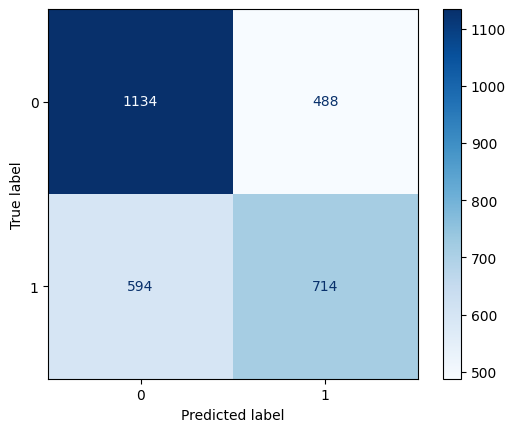

In [71]:
cm_naive_bayes = confusion_matrix(y_test, y_pred_naive_bayes)

disp = ConfusionMatrixDisplay(confusion_matrix=cm_naive_bayes)
disp.plot(cmap=plt.cm.Blues)
plt.show()


## XGBoost

In [72]:
xgboostModel = XGBClassifier()
xgboostModel.fit(x_train, y_train)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [73]:
xgboostModelAccuracy = np.mean(cross_val_score(xgboostModel, x_train, y_train, scoring=make_scorer(accuracy_score), cv=30))*100
xgboostModelPrecision = np.mean(cross_val_score(xgboostModel, x_train, y_train, scoring=make_scorer(precision_score), cv=30))*100
xgboostModelSenstivity = np.mean(cross_val_score(xgboostModel, x_train, y_train, scoring=make_scorer(recall_score), cv=30))*100
xgboostModelF1Score = np.mean(cross_val_score(xgboostModel, x_train, y_train, scoring=make_scorer(f1_score), cv=30))*100
xgboostModelMCCScore = np.mean(cross_val_score(xgboostModel, x_train, y_train, scoring=make_scorer(matthews_corrcoef), cv=30))*100
xgboostModelKappaCoeff = np.mean(cross_val_score(xgboostModel, x_train, y_train, scoring=make_scorer(cohen_kappa_score), cv=30))*100


In [74]:
print("Train Accuracy: ", xgboostModelAccuracy*100)
print("Train Precision: ", xgboostModelPrecision*100)
print("Train Senstivity: ", xgboostModelSenstivity*100)
print("Train F1 Score: ", xgboostModelF1Score*100)
print("Train MCC Score: ", xgboostModelMCCScore*100)
print("Train Kappa Coefficiet: ", xgboostModelKappaCoeff*100)


Train Accuracy:  9035.654481283975
Train Precision:  8957.006657981545
Train Senstivity:  8855.016501650167
Train F1 Score:  8902.46176778782
Train MCC Score:  8047.776539230777
Train Kappa Coefficiet:  8042.6945113056245


In [75]:
y_pred_xgboost = xgboostModel.predict(x_test)


In [76]:
mse_xgboost = mean_squared_error(y_test, y_pred_xgboost)
rmse_xgboost = np.sqrt(mse_xgboost)
mae_xgboost = mean_absolute_error(y_test, y_pred_xgboost)

print(f"MSE: {mse_xgboost}")
print(f"RMSE: {rmse_xgboost}")
print(f"MAE: {mae_xgboost}")


MSE: 0.09488054607508532
RMSE: 0.308026859340359
MAE: 0.09488054607508532


In [77]:
xgboostModelTestAccuracy = accuracy_score(y_test, y_pred_xgboost)*100
xgboostModelTestPrecision = precision_score(y_test, y_pred_xgboost)*100
xgboostModelTestSenstivity = recall_score(y_test, y_pred_xgboost)*100
xgboostModelTestF1Score = f1_score(y_test, y_pred_xgboost)*100
xgboostModelTestMCCScore = matthews_corrcoef(y_test, y_pred_xgboost)*100
xgboostModelTestKappaCoeff = cohen_kappa_score(y_test, y_pred_xgboost)*100

print(f"Test Accuracy: {xgboostModelTestAccuracy*100}")
print(f"Test Precision: {xgboostModelTestPrecision*100}")
print(f"Test Senstivity: {xgboostModelTestSenstivity*100}")
print(f"Test F1 Score: {xgboostModelTestF1Score*100}")
print(f"Test MCC Score: {xgboostModelTestMCCScore*100}")
print(f"Test Kappa Coefficiet: {xgboostModelTestKappaCoeff*100}")


Test Accuracy: 9051.194539249147
Test Precision: 9113.418530351439
Test Senstivity: 8723.241590214067
Test F1 Score: 8914.0625
Test MCC Score: 8078.446424478811
Test Kappa Coefficiet: 8072.353823201994


In [78]:
report_xgboost = classification_report(y_test, y_pred_xgboost)
print(report_xgboost)


              precision    recall  f1-score   support

           0       0.90      0.93      0.92      1622
           1       0.91      0.87      0.89      1308

    accuracy                           0.91      2930
   macro avg       0.91      0.90      0.90      2930
weighted avg       0.91      0.91      0.90      2930



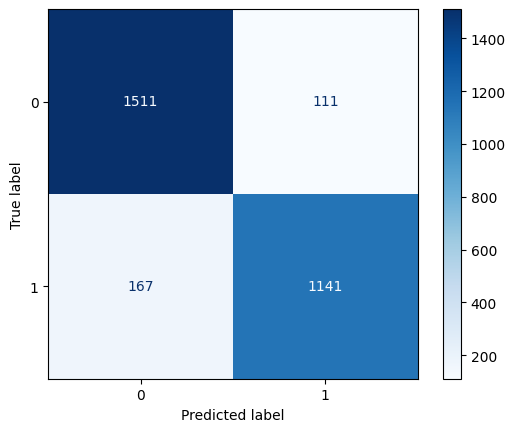

In [79]:
cm_xgboost = confusion_matrix(y_test, y_pred_xgboost)

disp = ConfusionMatrixDisplay(confusion_matrix=cm_xgboost)
disp.plot(cmap=plt.cm.Blues)
plt.show()


## AdaBoost

In [80]:
adaboostModel = AdaBoostClassifier()
adaboostModel.fit(x_train, y_train)


/Users/brahderlau/anaconda3/envs/capstone/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoostClassifier()

In [81]:
adaboostModelAccuracy = np.mean(cross_val_score(adaboostModel, x_train, y_train, scoring=make_scorer(accuracy_score), cv=30))*100
adaboostModelPrecision = np.mean(cross_val_score(adaboostModel, x_train, y_train, scoring=make_scorer(precision_score), cv=30))*100
adaboostModelSenstivity = np.mean(cross_val_score(adaboostModel, x_train, y_train, scoring=make_scorer(recall_score), cv=30))*100
adaboostModelF1Score = np.mean(cross_val_score(adaboostModel, x_train, y_train, scoring=make_scorer(f1_score), cv=30))*100
adaboostModelMCCScore = np.mean(cross_val_score(adaboostModel, x_train, y_train, scoring=make_scorer(matthews_corrcoef), cv=30))*100
adaboostModelKappaCoeff = np.mean(cross_val_score(adaboostModel, x_train, y_train, scoring=make_scorer(cohen_kappa_score), cv=30))*100


/Users/brahderlau/anaconda3/envs/capstone/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/brahderlau/anaconda3/envs/capstone/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/brahderlau/anaconda3/envs/capstone/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/brahderlau/anaconda3/envs/capstone/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecat

In [82]:
print("Train Accuracy: ", adaboostModelAccuracy*100)
print("Train Precision: ", adaboostModelPrecision*100)
print("Train Senstivity: ", adaboostModelSenstivity*100)
print("Train F1 Score: ", adaboostModelF1Score*100)
print("Train MCC Score: ", adaboostModelMCCScore*100)
print("Train Kappa Coefficiet: ", adaboostModelKappaCoeff*100)


Train Accuracy:  7598.771156967309
Train Precision:  7406.424561327721
Train Senstivity:  7051.782178217822
Train F1 Score:  7220.2349716214485
Train MCC Score:  5119.103407721856
Train Kappa Coefficiet:  5109.373352783182


In [83]:
y_pred_adaboost = adaboostModel.predict(x_test)


In [84]:
mse_adaboost = mean_squared_error(y_test, y_pred_adaboost)
rmse_adaboost = np.sqrt(mse_adaboost)
mae_adaboost = mean_absolute_error(y_test, y_pred_adaboost)

print(f"MSE: {mse_adaboost}")
print(f"RMSE: {rmse_adaboost}")
print(f"MAE: {mae_adaboost}")


MSE: 0.2614334470989761
RMSE: 0.511305629833054
MAE: 0.2614334470989761


In [85]:
adaboostModelTestAccuracy = accuracy_score(y_test, y_pred_adaboost)*100
adaboostModelTestPrecision = precision_score(y_test, y_pred_adaboost)*100
adaboostModelTestSenstivity = recall_score(y_test, y_pred_adaboost)*100
adaboostModelTestF1Score = f1_score(y_test, y_pred_adaboost)*100
adaboostModelTestMCCScore = matthews_corrcoef(y_test, y_pred_adaboost)*100
adaboostModelTestKappaCoeff = cohen_kappa_score(y_test, y_pred_adaboost)*100

print(f"Test Accuracy: {adaboostModelTestAccuracy*100}")
print(f"Test Precision: {adaboostModelTestPrecision*100}")
print(f"Test Senstivity: {adaboostModelTestSenstivity*100}")
print(f"Test F1 Score: {adaboostModelTestF1Score*100}")
print(f"Test MCC Score: {adaboostModelTestMCCScore*100}")
print(f"Test Kappa Coefficiet: {adaboostModelTestKappaCoeff*100}")


Test Accuracy: 7385.66552901024
Test Precision: 7308.347529812606
Test Senstivity: 6559.633027522935
Test F1 Score: 6913.779210314263
Test MCC Score: 4678.081248865522
Test Kappa Coefficiet: 4657.606765504837


In [86]:
report_adaboost = classification_report(y_test, y_pred_adaboost)
print(report_adaboost)


              precision    recall  f1-score   support

           0       0.74      0.81      0.77      1622
           1       0.73      0.66      0.69      1308

    accuracy                           0.74      2930
   macro avg       0.74      0.73      0.73      2930
weighted avg       0.74      0.74      0.74      2930



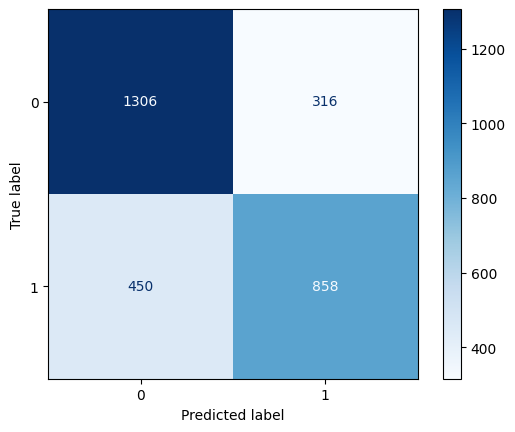

In [87]:
cm_adaboost = confusion_matrix(y_test, y_pred_adaboost)

disp = ConfusionMatrixDisplay(confusion_matrix=cm_adaboost)
disp.plot(cmap=plt.cm.Blues)
plt.show()


# Model Comparison

## Metrics Comparison on Train Data

### Classification Performance Metrics

In [88]:
arr_train = np.array([["Logistic Regression", logisticModelAccuracy, logisticModelPrecision, logisticModelSenstivity, logisticModelF1Score, logisticModelMCCScore, logisticModelKappaCoeff]])
arr_train = np.insert(arr_train, 0, ["SVM", svmModelAccuracy, svmModelPrecision, svmModelSenstivity, svmModelF1Score, svmModelMCCScore, svmModelKappaCoeff], axis=0)
arr_train = np.insert(arr_train, 0, ["Decision Tree", decisionTreeModelAccuracy, decisionTreeModelPrecision, decisionTreeModelSenstivity, decisionTreeModelF1Score, decisionTreeModelMCCScore, decisionTreeModelKappaCoeff], axis=0)
arr_train = np.insert(arr_train, 0, ["Random Forest", randomForestModelAccuracy, randomForestModelPrecision, randomForestModelSenstivity, randomForestModelF1Score, randomForestModelMCCScore, randomForestModelKappaCoeff], axis=0)
arr_train = np.insert(arr_train, 0, ["KNN", KNNModelAccuracy, KNNModelPrecision, KNNModelSenstivity, KNNModelF1Score, KNNModelMCCScore, KNNModelKappaCoeff], axis=0)
arr_train = np.insert(arr_train, 0, ["Naive Bayes", naiveBayesModelAccuracy, naiveBayesModelPrecision, naiveBayesModelSenstivity, naiveBayesModelF1Score, naiveBayesModelMCCScore, naiveBayesModelKappaCoeff], axis=0)
arr_train = np.insert(arr_train, 0, ["XGBoost", xgboostModelAccuracy, xgboostModelPrecision, xgboostModelSenstivity, xgboostModelF1Score, xgboostModelMCCScore, xgboostModelKappaCoeff], axis=0)
arr_train = np.insert(arr_train, 0, ["AdaBoost", adaboostModelAccuracy, adaboostModelPrecision, adaboostModelSenstivity, adaboostModelF1Score, adaboostModelMCCScore, adaboostModelKappaCoeff], axis=0)


In [89]:
arr_train = pd.DataFrame(arr_train, columns=['Model', 'Accuracy', 'Precision', 'Senstivity', 'F1 Score', 'MCC Score', 'Kappa Coeff'])


In [90]:
arr_train


,Model,Accuracy,Precision,Senstivity,F1 Score,MCC Score,Kappa Coeff
0,AdaBoost,75.9877115696731,74.06424561327721,70.51782178217822,72.20234971621448,51.19103407721855,51.093733527831816
1,XGBoost,90.35654481283974,89.57006657981545,88.55016501650167,89.0246176778782,80.47776539230777,80.42694511305625
2,Naive Bayes,65.0425071489296,61.2197007194838,57.24521452145215,59.11964772987255,28.732972384627786,28.655846455036055
3,KNN,88.58580003606667,87.4052925782226,86.72805280528053,87.04611245895627,76.87380728186297,76.84529384091519
4,Random Forest,90.29832289976041,90.52871420333932,86.96435643564357,88.81699977780247,80.43471208327915,80.24307977072654
5,Decision Tree,85.52728186104027,84.35649099361058,83.12178217821783,83.79177184541538,70.87360954712037,70.64231567262482
6,SVM,86.37671638714995,86.68024385395692,81.83201320132014,84.1473474776269,72.36169269154684,72.22311133050083
7,Logistic Regression,74.6415230440271,73.30641377848939,67.17392739273927,70.06104903835823,48.326411592484966,48.14645663003126


** Random Forest and XG Boost classifier are very close to each other. Hence I am going to use both of them with different hyperameters to see which one performs better.

## Metrics Comparison on Test Data

### Classification Performance Metrics

In [91]:
arr_test = np.array([["Logistic Regression", logisticModelTestAccuracy, logisticModelTestPrecision, logisticModelTestSenstivity, logisticModelTestF1Score, logisticModelTestMCCScore, logisticModelTestKappaCoeff]])
arr_test = np.insert(arr_test, 0, ["SVM", svmModelTestAccuracy, svmModelTestPrecision, svmModelTestSenstivity, svmModelTestF1Score, svmModelTestMCCScore, svmModelTestKappaCoeff], axis=0)
arr_test = np.insert(arr_test, 0, ["Decision Tree", decisionTreeModelTestAccuracy, decisionTreeModelTestPrecision, decisionTreeModelTestSenstivity, decisionTreeModelTestF1Score, decisionTreeModelTestMCCScore, decisionTreeModelTestKappaCoeff], axis=0)
arr_test = np.insert(arr_test, 0, ["Random Forest", randomForestModelTestAccuracy, randomForestModelTestPrecision, randomForestModelTestSenstivity, randomForestTestModelF1Score, randomForestModelTestMCCScore, randomForestModelTestKappaCoeff], axis=0)
arr_test = np.insert(arr_test, 0, ["KNN", KNNModelTestAccuracy, KNNModelTestPrecision, KNNModelTestSenstivity, KNNModelTestF1Score, KNNModelTestMCCScore, KNNModelTestKappaCoeff], axis=0)
arr_test = np.insert(arr_test, 0, ["Naive Bayes", naiveBayesModelTestAccuracy, naiveBayesModelTestPrecision, naiveBayesModelTestSenstivity, naiveBayesModelTestF1Score, naiveBayesModelTestMCCScore, naiveBayesModelTestKappaCoeff], axis=0)
arr_test = np.insert(arr_test, 0, ["XGBoost", xgboostModelTestAccuracy, xgboostModelTestPrecision, xgboostModelTestSenstivity, xgboostModelTestF1Score, xgboostModelTestMCCScore, xgboostModelTestKappaCoeff], axis=0)
arr_test = np.insert(arr_test, 0, ["AdaBoost", adaboostModelTestAccuracy, adaboostModelTestPrecision, adaboostModelTestSenstivity, adaboostModelTestF1Score, adaboostModelTestMCCScore, adaboostModelTestKappaCoeff], axis=0)


In [92]:
arr_test = pd.DataFrame(arr_test, columns=['Model', 'Accuracy', 'Precision', 'Senstivity', 'F1 Score', 'MCC Score', 'Kappa Coeff'])


In [93]:
arr_test


,Model,Accuracy,Precision,Senstivity,F1 Score,MCC Score,Kappa Coeff
0,AdaBoost,73.8566552901024,73.08347529812606,65.59633027522935,69.13779210314263,46.78081248865522,46.57606765504837
1,XGBoost,90.51194539249147,91.13418530351439,87.23241590214067,89.140625,80.78446424478811,80.72353823201993
2,Naive Bayes,63.0716723549488,59.40099833610649,54.58715596330275,56.89243027888446,24.76202839809542,24.69455099304776
3,KNN,88.43003412969284,88.48292295472598,85.16819571865443,86.7939228671601,76.55018344896966,76.50603179078502
4,Random Forest,90.06825938566553,91.10751818916734,86.16207951070336,88.56581532416503,79.89670339895791,79.79960472491612
5,Decision Tree,85.22184300341297,84.25998433829287,82.26299694189603,83.2495164410058,70.04766889016804,70.03154425100475
6,SVM,84.81228668941979,86.04845446950709,78.74617737003058,82.23552894211576,69.2242017288289,69.01716560946967
7,Logistic Regression,73.6518771331058,73.6331569664903,63.83792048929664,68.38656838656838,46.34070656930576,45.99614756157073


### Regression Performance Metrics

In [94]:
arr_regression = np.array([["Logistic Regression", mse_logistic, rmse_logistic, mae_logistic]])
arr_regression = np.insert(arr_regression, 0, ["SVM", mse_svm, rmse_svm, mae_svm], axis=0)
arr_regression = np.insert(arr_regression, 0, ["Decision Tree", mse_decision_tree, rmse_decision_tree, mae_decision_tree], axis=0)
arr_regression = np.insert(arr_regression, 0, ["Random Forest", mse_random_forest, rmse_random_forest, mae_random_forest], axis=0)
arr_regression = np.insert(arr_regression, 0, ["KNN", mse_knn, rmse_knn, mae_knn], axis=0)
arr_regression = np.insert(arr_regression, 0, ["Naive Bayes", mse_naive_bayes, rmse_naive_bayes, mae_naive_bayes], axis=0)
arr_regression = np.insert(arr_regression, 0, ["XGBoost", mse_xgboost, rmse_xgboost, mae_xgboost], axis=0)
arr_regression = np.insert(arr_regression, 0, ["AdaBoost", mse_adaboost, rmse_adaboost, mae_adaboost], axis=0)


In [95]:
arr_regression = pd.DataFrame(arr_regression, columns=['Model', 'MSE', 'RMSE', 'MAE'])


In [96]:
arr_regression


,Model,MSE,RMSE,MAE
0,AdaBoost,0.2614334470989761,0.511305629833054,0.2614334470989761
1,XGBoost,0.09488054607508532,0.308026859340359,0.09488054607508532
2,Naive Bayes,0.36928327645051195,0.6076868243186715,0.36928327645051195
3,KNN,0.11569965870307167,0.3401465253432286,0.11569965870307167
4,Random Forest,0.09931740614334471,0.31514664228473815,0.09931740614334471
5,Decision Tree,0.1477815699658703,0.3844236854902027,0.1477815699658703
6,SVM,0.15187713310580206,0.38971416846940793,0.15187713310580206
7,Logistic Regression,0.26348122866894197,0.5133042262332758,0.26348122866894197


# Final Comparison: Random Forest vs XG Boost using GridSearch

In [101]:
# Random Forest Hyperparameter Grid
random_forest_param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Define Scoring Metrics
scorers = {
    'accuracy': make_scorer(accuracy_score),
    'precision': make_scorer(precision_score),
    'sensitivity': make_scorer(recall_score),
    'f1': make_scorer(f1_score),
    'mcc': make_scorer(matthews_corrcoef),
    'kappa': make_scorer(cohen_kappa_score)
}

# Random Forest Grid Search
random_forest_model = RandomForestClassifier(random_state=42)
grid_search_rf = GridSearchCV(
    estimator=random_forest_model, 
    param_grid=random_forest_param_grid, 
    scoring=scorers, 
    refit='f1', 
    cv=5, 
    return_train_score=True
)
grid_search_rf.fit(x_train, y_train)


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [None, 10, 20, 30],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             refit='f1', return_train_score=True,
             scoring={'accuracy': make_scorer(accuracy_score, response_method='predict'),
                      'f1': make_scorer(f1_score, response_method='predict'),
                      'kappa': make_scorer(cohen_kappa_score, response_method='predict'),
                      'mcc': make_scorer(matthews_corrcoef, response_method='predict'),
                      'precision': make_scorer(precision_score, response_method='predict'),
                      'sensitivity': make_scorer(recall_score, response_method='predict')})

Best Random Forest Model saved successfully.

Random Forest Best Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}

Test Accuracy: 8989.761092150171
Test Precision: 9074.074074074075
Test Senstivity: 8616.207951070337
Test F1 Score: 8839.21568627451
Test MCC Score: 7954.362346013368
Test Kappa Coefficiet: 7946.015894172737

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.93      0.91      1622
           1       0.91      0.86      0.88      1308

    accuracy                           0.90      2930
   macro avg       0.90      0.90      0.90      2930
weighted avg       0.90      0.90      0.90      2930



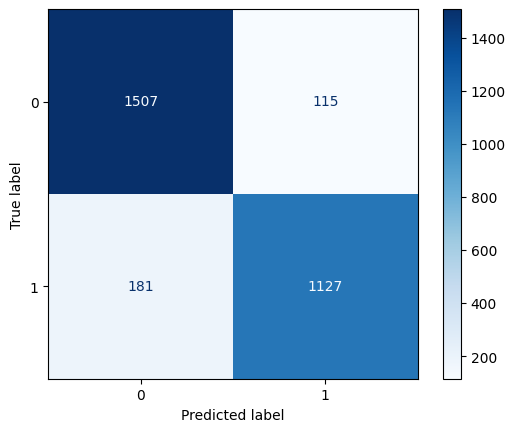

Final MSE: 0.10102389078498293
Final RMSE: 0.31784255659836197
Final MAE: 0.10102389078498293


In [116]:
# Evaluate Random Forest Best Model
rf_best = grid_search_rf.best_estimator_

rf_saved_name = "best_rf_model_" + str(grid_search_rf.best_params_) + ".pkl"
with open(rf_saved_name, 'wb') as model_file:
    pickle.dump(grid_search_rf, model_file)

print("Best Random Forest Model saved successfully.")

y_pred_rf = rf_best.predict(x_test)
print("\nRandom Forest Best Parameters:", grid_search_rf.best_params_)

finalRfModelTestAccuracy = accuracy_score(y_test, y_pred_rf)*100
finalRfModelTestPrecision = precision_score(y_test, y_pred_rf)*100
finalRfModelTestSenstivity = recall_score(y_test, y_pred_rf)*100
finalRfModelTestF1Score = f1_score(y_test, y_pred_rf)*100
finalRfModelTestMCCScore = matthews_corrcoef(y_test, y_pred_rf)*100
finalRfModelTestKappaCoeff = cohen_kappa_score(y_test, y_pred_rf)*100

print(f"\nTest Accuracy: {finalRfModelTestAccuracy*100}")
print(f"Test Precision: {finalRfModelTestPrecision*100}")
print(f"Test Senstivity: {finalRfModelTestSenstivity*100}")
print(f"Test F1 Score: {finalRfModelTestF1Score*100}")
print(f"Test MCC Score: {finalRfModelTestMCCScore*100}")
print(f"Test Kappa Coefficiet: {finalRfModelTestKappaCoeff*100}")

print("\nRandom Forest Classification Report:")
print(classification_report(y_test, y_pred_rf))
cm_rf = confusion_matrix(y_test, y_pred_rf)
disp_rf = ConfusionMatrixDisplay(confusion_matrix=cm_rf)
disp_rf.plot(cmap=plt.cm.Blues)
plt.show()

final_mse_rf = mean_squared_error(y_test, y_pred_rf)
final_rmse_rf = np.sqrt(final_mse_rf)
final_mae_rf = mean_absolute_error(y_test, y_pred_rf)

print(f"Final MSE: {final_mse_rf}")
print(f"Final RMSE: {final_rmse_rf}")
print(f"Final MAE: {final_mae_rf}")


In [110]:
# XGBoost Hyperparameter Grid
xgboost_param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7, 10],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.7, 0.8, 0.9]
}

# XGBoost Grid Search
xgboost_model = XGBClassifier(random_state=42)
grid_search_xgb = GridSearchCV(
    estimator=xgboost_model, 
    param_grid=xgboost_param_grid, 
    scoring=scorers, 
    refit='f1', 
    cv=5, 
    return_train_score=True
)
grid_search_xgb.fit(x_train, y_train)


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
             scoring={'accuracy': make_scorer(accuracy_score, response_method='predict'),
                      'f1': make_scorer(f1_score, response_method='predict'),
                      'kappa': make_scorer(cohen_kappa_score, response_method='predict'),
                      'mcc': make_scorer(matthews_corrcoef, response_method='predict'),
                      'precision': make_scorer(precision_score, response_method='predict'),
                      'sensitivity': make_scorer(recall_score, response_method='predict')})

Best XG Boost Model saved successfully.
XGBoost Best Parameters: {'learning_rate': 0.1, 'max_depth': 10, 'n_estimators': 300, 'subsample': 0.8}

Test Accuracy: 9143.34470989761
Test Precision: 9132.13448006255
Test Senstivity: 8929.663608562692
Test F1 Score: 9029.764205643602
Test MCC Score: 8264.720604340355
Test Kappa Coefficiet: 8263.056187863805

XGBoost Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.93      0.92      1622
           1       0.91      0.89      0.90      1308

    accuracy                           0.91      2930
   macro avg       0.91      0.91      0.91      2930
weighted avg       0.91      0.91      0.91      2930



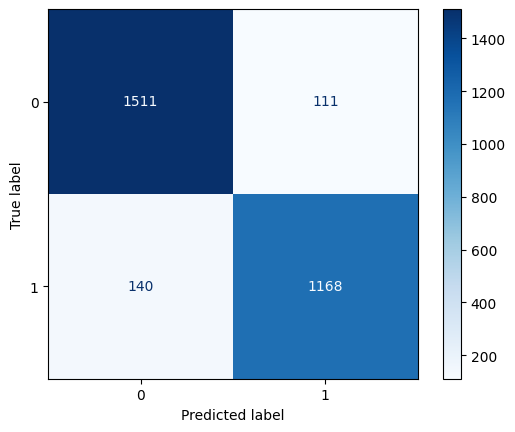

Final MSE: 0.08566552901023891
Final RMSE: 0.29268674211559176
Final MAE: 0.08566552901023891


In [117]:
# Evaluate XGBoost Best Model
xgb_best = grid_search_xgb.best_estimator_

xgb_saved_name = "best_xgb_model_" + str(grid_search_xgb.best_params_) + ".pkl"
with open(xgb_saved_name, 'wb') as model_file:
    pickle.dump(xgb_best, model_file)

print("Best XG Boost Model saved successfully.")

y_pred_xgb = xgb_best.predict(x_test)
print("XGBoost Best Parameters:", grid_search_xgb.best_params_)

finalXgbModelTestAccuracy = accuracy_score(y_test, y_pred_xgb)*100
finalXgbModelTestPrecision = precision_score(y_test, y_pred_xgb)*100
finalXgbModelTestSenstivity = recall_score(y_test, y_pred_xgb)*100
finalXgbModelTestF1Score = f1_score(y_test, y_pred_xgb)*100
finalXgbModelTestMCCScore = matthews_corrcoef(y_test, y_pred_xgb)*100
finalXgbModelTestKappaCoeff = cohen_kappa_score(y_test, y_pred_xgb)*100

print(f"\nTest Accuracy: {finalXgbModelTestAccuracy*100}")
print(f"Test Precision: {finalXgbModelTestPrecision*100}")
print(f"Test Senstivity: {finalXgbModelTestSenstivity*100}")
print(f"Test F1 Score: {finalXgbModelTestF1Score*100}")
print(f"Test MCC Score: {finalXgbModelTestMCCScore*100}")
print(f"Test Kappa Coefficiet: {finalXgbModelTestKappaCoeff*100}")

print("\nXGBoost Classification Report:")
print(classification_report(y_test, y_pred_xgb))
cm_xgb = confusion_matrix(y_test, y_pred_xgb)
disp_xgb = ConfusionMatrixDisplay(confusion_matrix=cm_xgb)
disp_xgb.plot(cmap=plt.cm.Blues)
plt.show()

final_mse_xgb = mean_squared_error(y_test, y_pred_xgb)
final_rmse_xgb= np.sqrt(final_mse_xgb)
final_mae_xgb= mean_absolute_error(y_test, y_pred_xgb)

print(f"Final MSE: {final_mse_xgb}")
print(f"Final RMSE: {final_rmse_xgb}")
print(f"Final MAE: {final_mae_xgb}")


# Conclusion

After applying the GridSearch method, it can be seen that XG Boost performs slightly better than the previous default parameters as well as hypertuned Random Forest. The classification and regression performance of the model has increased by 0.01 - 0.02 in each metrics

# Neural Network Attempt (IGNORE)

In [97]:
'''
Artificial Neural Network Class
'''
class ANN:
    np.random.seed(10)
    
    '''
    Initialize the ANN;
    HiddenLayer vector : will contain the Layers' info
    w, b, phi = (empty) arrays that will contain all the w, b and activation functions for all the Layers
    mu = cost function
    eta = a standard learning rate initialization. It can be modified by the 'set_learning_rate' method
    '''
    def __init__(self) :
        self.HiddenLayer = []
        self.w = []
        self.b = []
        self.phi = []
        self.mu = []
        self.eta = 1 #set up the proper Learning Rate!!
    
    '''
    add method: to add layers to the network
    '''
    def add(self, lay = (4, 'ReLU') ):
        self.HiddenLayer.append(lay)
    
    '''
    FeedForward method: as explained before. 
    '''
    @staticmethod
    def FeedForward(w, b, phi, x):
        return phi(np.dot(w, x) + b)
        
    '''
    BackPropagation algorithm implementing the Gradient Descent 
    '''
    def BackPropagation(self, x, z, Y, w, b, phi):
        self.delta = []
        
        # We initialize ausiliar w and b that are used only inside the backpropagation algorithm once called        
        self.W = []
        self.B = []
        
        # We start computing the LAST error, the one for the OutPut Layer 
        self.delta.append(  (z[len(z)-1] - Y) * phi[len(z)-1](z[len(z)-1], der=True) )
        
        '''Now we BACKpropagate'''
        # We thus compute from next-to-last to first
        for i in range(0, len(z)-1):
            self.delta.append( np.dot( self.delta[i], w[len(z)- 1 - i] ) * phi[len(z)- 2 - i](z[len(z)- 2 - i], der=True) )
        
        # We have the error array ordered from last to first; we flip it to order it from first to last
        self.delta = np.flip(self.delta, 0)  
        
        # Now we define the delta as the error divided by the number of training samples
        self.delta = self.delta/self.X.shape[0] 
        
        '''GRADIENT DESCENT'''
        # We start from the first layer that is special, since it is connected to the Input Layer
        self.W.append( w[0] - self.eta * np.kron(self.delta[0], x).reshape( len(z[0]), x.shape[0] ) )
        self.B.append( b[0] - self.eta * self.delta[0] )
        
        # We now descend for all the other Hidden Layers + OutPut Layer
        for i in range(1, len(z)):
            self.W.append( w[i] - self.eta * np.kron(self.delta[i], z[i-1]).reshape(len(z[i]), len(z[i-1])) )
            self.B.append( b[i] - self.eta * self.delta[i] )
        
        # We return the descended parameters w, b
        return np.array(self.W), np.array(self.B)
    
    
    '''
    Fit method: it calls FeedForward and Backpropagation methods
    '''
    def Fit(self, x_train, y_train):            
        print('Start fitting...')
        '''
        Input layer
        '''
        self.X = x_train
        self.Y = y_train
        
        '''
        We now initialize the Network by retrieving the Hidden Layers and concatenating them 
        '''
        print('Model recap: \n')
        print('You are fitting an ANN with the following amount of layers: ', len(self.HiddenLayer))
        
        for i in range(0, len(self.HiddenLayer)) :
            print('Layer ', i+1)
            print('Number of neurons: ', self.HiddenLayer[i][0])
            if i==0:
                # We now try to use the He et al. Initialization from ArXiv:1502.01852
                self.w.append( np.random.randn(self.HiddenLayer[i][0] , self.X.shape[1])/np.sqrt(2/self.X.shape[1]) )
                self.b.append( np.random.randn(self.HiddenLayer[i][0])/np.sqrt(2/self.X.shape[1]))
                # Old initialization
                #self.w.append(2 * np.random.rand(self.HiddenLayer[i][0] , self.X.shape[1]) - 0.5)
                #self.b.append(np.random.rand(self.HiddenLayer[i][0]))
                
                # Initialize the Activation function
                for act in Activation_function.list_act():
                    if self.HiddenLayer[i][1] == act :
                        self.phi.append(Activation_function.get_act(act))
                        print('\tActivation: ', act)

            else :
                # We now try to use the He et al. Initialization from ArXiv:1502.01852
                self.w.append( np.random.randn(self.HiddenLayer[i][0] , self.HiddenLayer[i-1][0] )/np.sqrt(2/self.HiddenLayer[i-1][0]))
                self.b.append( np.random.randn(self.HiddenLayer[i][0])/np.sqrt(2/self.HiddenLayer[i-1][0]))
                # Old initialization
                #self.w.append(2*np.random.rand(self.HiddenLayer[i][0] , self.HiddenLayer[i-1][0] ) - 0.5)
                #self.b.append(np.random.rand(self.HiddenLayer[i][0]))
                
                # Initialize the Activation function
                for act in Activation_function.list_act():
                    if self.HiddenLayer[i][1] == act :
                        self.phi.append(Activation_function.get_act(act))
                        print('\tActivation: ', act)
            
        '''
        Now we start the Loop over the training dataset
        '''  
        for I in range(0, self.X.shape[0]): # loop over the training set
            '''
            Now we start the feed forward
            '''  
            self.z = []
            
            self.z.append( self.FeedForward(self.w[0], self.b[0], self.phi[0], self.X[I]) ) # First layers
            
            for i in range(1, len(self.HiddenLayer)): #Looping over layers
                self.z.append( self.FeedForward(self.w[i] , self.b[i], self.phi[i], self.z[i-1] ) )
        
            
            '''
            Here we backpropagate
            '''      
            self.w, self.b  = self.BackPropagation(self.X[I], self.z, self.Y[I], self.w, self.b, self.phi)
            
            '''
            Compute cost function
            ''' 
            self.mu.append(
                (1/2) * np.dot(self.z[len(self.z)-1] - self.Y[I], self.z[len(self.z)-1] - self.Y[I]) 
            )
            
        print('Fit done. \n')
        

    
    '''
    predict method
    '''
    def predict(self, x_test):
        
        print('Starting predictions...')
        
        self.pred = []
        self.XX = x_test
        
        for I in range(0, self.XX.shape[0]): # loop over the training set
            
            '''
            Now we start the feed forward
            '''  
            self.z = []
            
            self.z.append(self.FeedForward(self.w[0] , self.b[0], self.phi[0], self.XX[I])) #First layer
    
            for i in range(1, len(self.HiddenLayer)) : # loop over the layers
                self.z.append( self.FeedForward(self.w[i] , self.b[i], self.phi[i], self.z[i-1]))
       
            # Append the prediction;
            # We now need a binary classifier; we this apply an Heaviside Theta and we set to 0.5 the threshold
            # if y < 0.5 the output is zero, otherwise is zero
            self.pred.append( np.heaviside(  self.z[-1] - 0.5, 1)[0] ) # NB: self.z[-1]  is the last element of the self.z list
        
        print('Predictions done. \n')

        return np.array(self.pred)
   
    '''
    We need a method to retrieve the accuracy for each training data to follow the learning of the ANN
    '''
    def get_accuracy(self):
        return np.array(self.mu)
    # This is the averaged version
    def get_avg_accuracy(self):
        import math
        self.batch_loss = []
        for i in range(0, 10):
            self.loss_avg = 0
            # To set the batch in 10 element/batch we use math.ceil method
            # int(math.ceil((self.X.shape[0]-10) / 10.0))    - 1
            for m in range(0, (int(math.ceil((self.X.shape[0]-10) / 10.0))   )-1):
                #self.loss_avg += self.mu[60*i+m]/60
                self.loss_avg += self.mu[(int(math.ceil((self.X.shape[0]-10) / 10.0)) )*i + m]/(int(math.ceil((self.X.shape[0]-10) / 10.0)) )
            self.batch_loss.append(self.loss_avg)
        return np.array(self.batch_loss)
    
    '''
    Method to set the learning rate
    '''
    def set_learning_rate(self, et=1):
        self.eta = et
        
        
'''
layers class
'''
class layers :
    '''
    Layer method: used to call standar layers to add. 
    Easily generalizable to more general layers (Pooling and Convolutional layers)
    '''        
    def layer(p=4, activation = 'ReLU'):
        return (p, activation)

'''
Activation functions class
'''
class Activation_function(ANN):
    
    def __init__(self) :
        super().__init__()
        
    '''
    Define the sigmoid activator; we ask if we want the sigmoid or its derivative
    '''
    def sigmoid_act(x, der=False):
        if (der==True) : #derivative of the sigmoid
            f = 1/(1+ np.exp(- x))*(1-1/(1+ np.exp(- x)))
        else : # sigmoid
            f = 1/(1+ np.exp(- x))
        return f

    '''
    Define the Rectifier Linear Unit (ReLU)
    '''
    def reLU_act(x, der=False):
        if (der == True): # the derivative of the ReLU is the Heaviside Theta
            f = np.heaviside(x, 1)
        else :
            f = np.maximum(x, 0)
        return f
    
    def list_act():
        return ['sigmoid', 'ReLU']
    
    def get_act(string = 'ReLU'):
        if string == 'ReLU':
            return Activation_function.reLU_act
        elif string == 'sigmoid':
            return Activation_function.sigmoid_act
        else :
            return Activation_function.sigmoid_act


In [98]:
model = ANN()

model.add(layers.layer(8, 'ReLU'))
model.add(layers.layer(4, 'ReLU'))
model.add(layers.layer(1, 'sigmoid'))

model.set_learning_rate(0.8)

model.Fit(x_train, y_train)
acc_val = model.get_accuracy()
acc_avg_val = model.get_avg_accuracy()

predictions = model.predict(x_test)


Start fitting...
Model recap: 

You are fitting an ANN with the following amount of layers:  3
Layer  1
Number of neurons:  8
	Activation:  ReLU
Layer  2
Number of neurons:  4
	Activation:  ReLU
Layer  3
Number of neurons:  1
	Activation:  sigmoid


KeyError: 0